In [1]:
import warnings
warnings.filterwarnings('ignore')

import mne
import numpy as np

import sys

from Scripts import *

# Load the data
epochs = mne.read_epochs('pour_antoine-epo.fif')

# Print some information about the data
print(epochs)

# Define the parameter grid
param_grid = {
    'baggingclassifier__base_estimator__C': [0.1, 1, 10, 100],
    'baggingclassifier__base_estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'baggingclassifier__base_estimator__degree': [2, 3, 4, 5],
    'baggingclassifier__base_estimator__gamma': ['scale', 'auto'] + [0.1, 1, 10, 100],
    'baggingclassifier__base_estimator__coef0': [0, 1, 2, 3, 4],
    'baggingclassifier__base_estimator__shrinking': [True, False],
    'baggingclassifier__base_estimator__tol': [1e-3, 1e-4, 1e-5],
    'baggingclassifier__base_estimator__max_iter': [100, 500, 1000, 5000],
    'baggingclassifier__n_estimators': [10, 20, 30],
}

best_time = 36

Reading c:\Users\antoi\Documents\Fichier Antoine\Fosca\Improving positional decoder Python scripts\pour_antoine-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1476 matching events found
No baseline correction applied
0 projection items activated
<EpochsFIF |  1476 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~86.5 MB, data loaded,
 '1': 246
 '2': 246
 '3': 246
 '4': 246
 '5': 246
 '6': 246>


## Showing the result of a simple model

0.0
1.4084507042253522
2.8169014084507045
4.225352112676056
5.633802816901409
7.042253521126761
8.450704225352112
9.859154929577464
11.267605633802818
12.676056338028168
14.084507042253522
15.492957746478872
16.901408450704224
18.30985915492958
19.718309859154928
21.12676056338028
22.535211267605636
23.943661971830984
25.352112676056336
26.76056338028169
28.169014084507044
29.577464788732392
30.985915492957744
32.3943661971831
33.80281690140845
35.2112676056338
36.61971830985916
38.028169014084504
39.436619718309856
40.845070422535215
42.25352112676056
43.66197183098591
45.07042253521127
46.478873239436616
47.88732394366197
49.29577464788733
50.70422535211267
52.112676056338024
53.52112676056338
54.929577464788736
56.33802816901409
57.74647887323944
59.154929577464785
60.56338028169014
61.97183098591549
63.38028169014085
64.7887323943662
66.19718309859155
67.6056338028169
69.01408450704226
70.4225352112676
71.83098591549296
73.23943661971832
74.64788732394366
76.05633802816901
77.46478

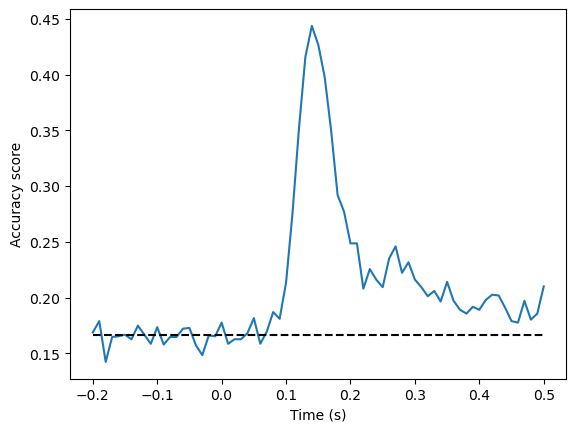

In [10]:
results = simple_model(epochs)
plot_simple_model(results, epochs)

## Optimising ML model

Using bagging ?

0.0
1.4084507042253522
2.8169014084507045
4.225352112676056
5.633802816901409
7.042253521126761
8.450704225352112
9.859154929577464
11.267605633802818
12.676056338028168
14.084507042253522
15.492957746478872
16.901408450704224
18.30985915492958
19.718309859154928
21.12676056338028
22.535211267605636
23.943661971830984
25.352112676056336
26.76056338028169
28.169014084507044
29.577464788732392
30.985915492957744
32.3943661971831
33.80281690140845
35.2112676056338
36.61971830985916
38.028169014084504
39.436619718309856
40.845070422535215
42.25352112676056
43.66197183098591
45.07042253521127
46.478873239436616
47.88732394366197
49.29577464788733
50.70422535211267
52.112676056338024
53.52112676056338
54.929577464788736
56.33802816901409
57.74647887323944
59.154929577464785
60.56338028169014
61.97183098591549
63.38028169014085
64.7887323943662
66.19718309859155
67.6056338028169
69.01408450704226
70.4225352112676
71.83098591549296
73.23943661971832
74.64788732394366
76.05633802816901
77.46478

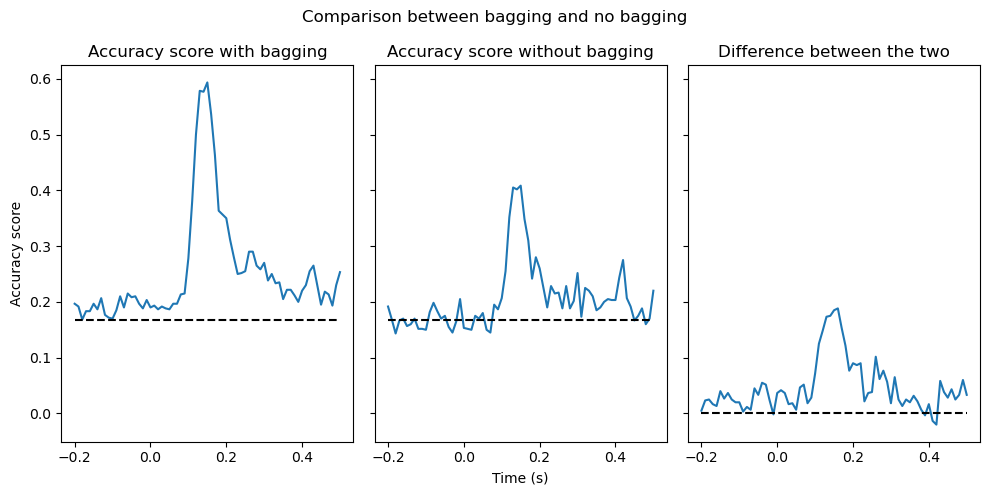

In [4]:
nb_trials = 100
best_params, no_bagging, bagging = comparison_bagging_or_not(epochs, nb_trials, param_grid)
plot_comparison(bagging, no_bagging, epochs)

## Reducing the amount of data

- Using PCA with reduced number of components to train the ML model
- Limit the search of best hyperparameters to only possible options
- Limit the amount of trials used for training

Testing PCA

0.0
(1476, 10) (1476,)
0.1
(1476, 20) (1476,)
0.2
(1476, 30) (1476,)
0.3
(1476, 40) (1476,)
0.4
(1476, 50) (1476,)
0.5
(1476, 60) (1476,)
0.6
(1476, 70) (1476,)
0.7
(1476, 80) (1476,)
0.8
(1476, 90) (1476,)
0.9
(1476, 100) (1476,)


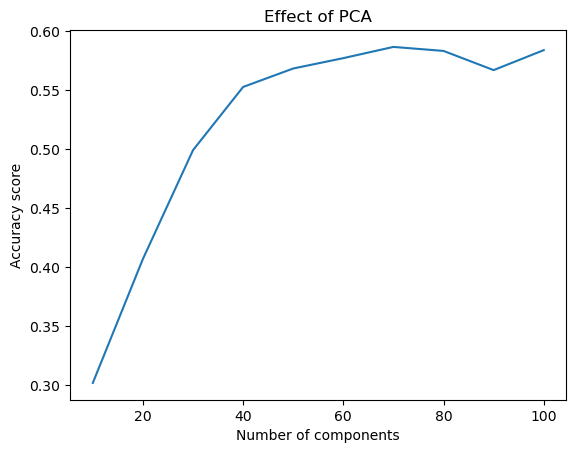

In [18]:
bagging_pca, number_of_components = effects_of_pca(epochs, param_grid, best_time)
plot_effects_of_pca(bagging_pca, number_of_components)

Limiting hyperparameters

0.0
0.2
0.4
0.6
0.8


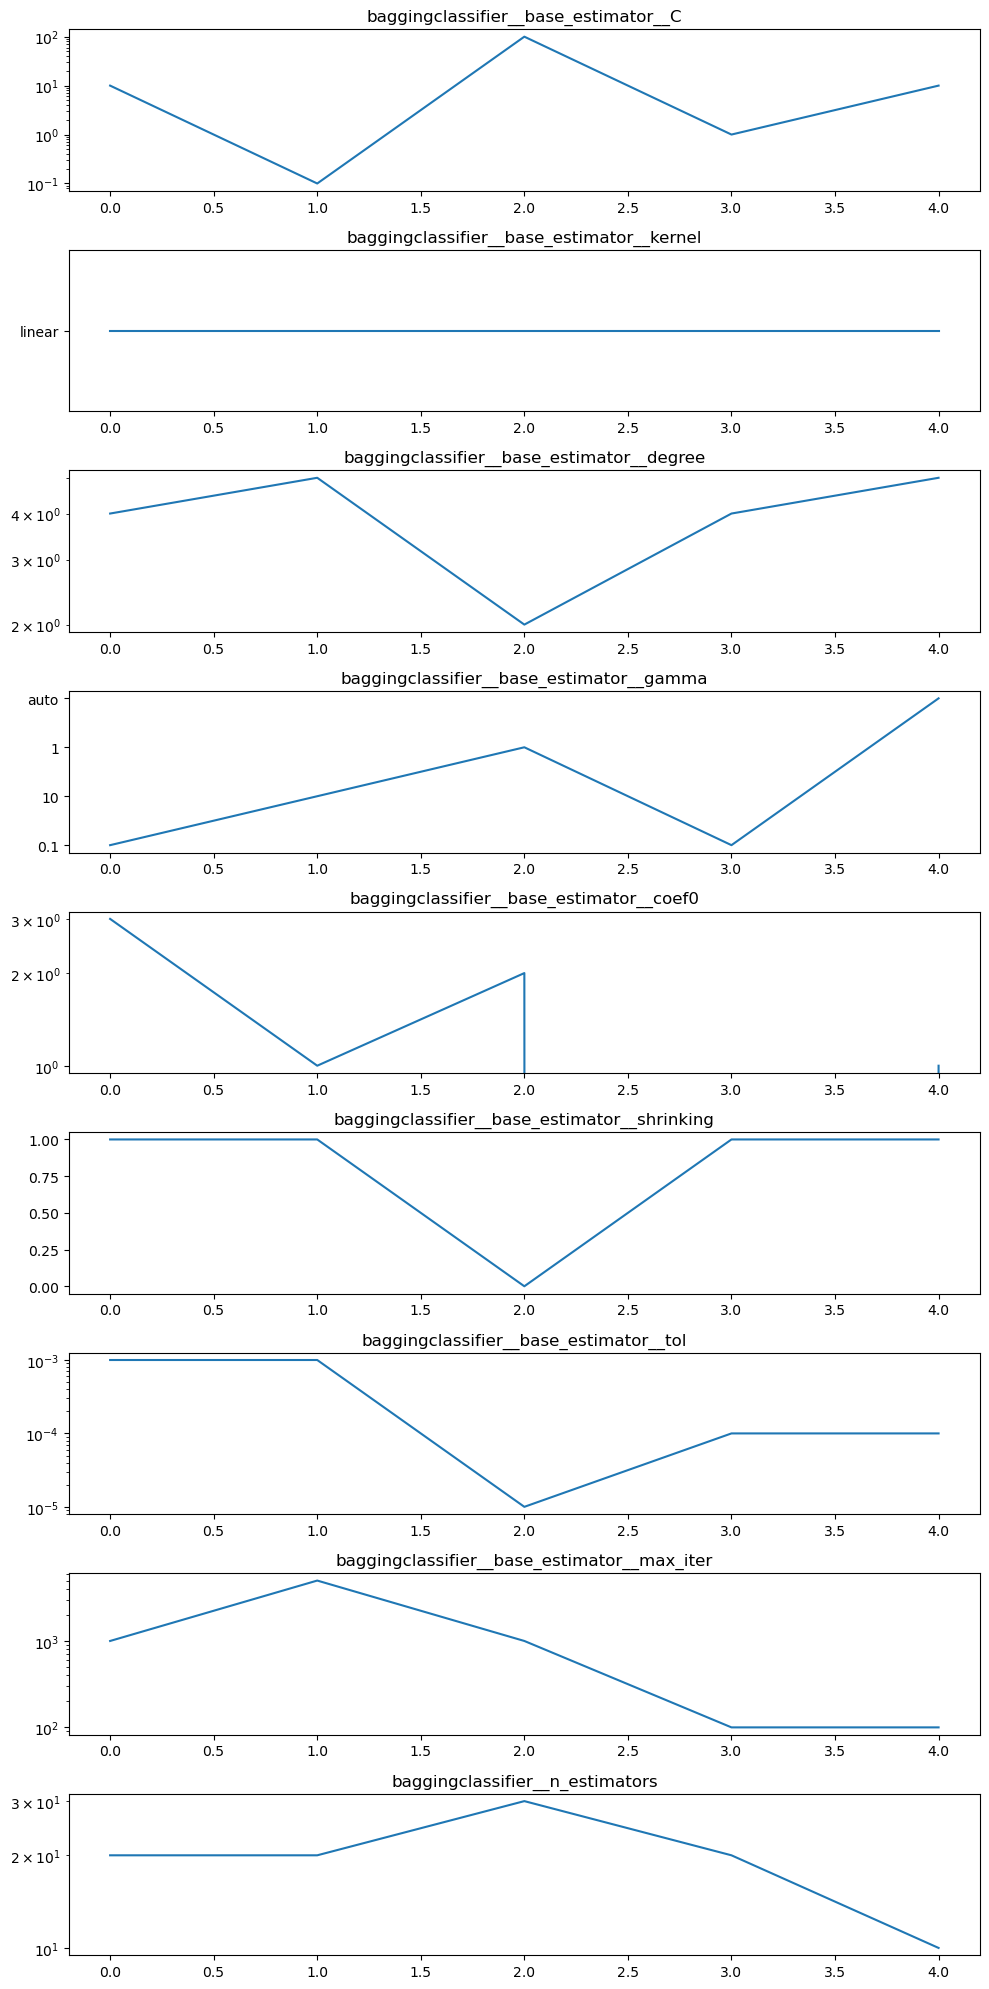

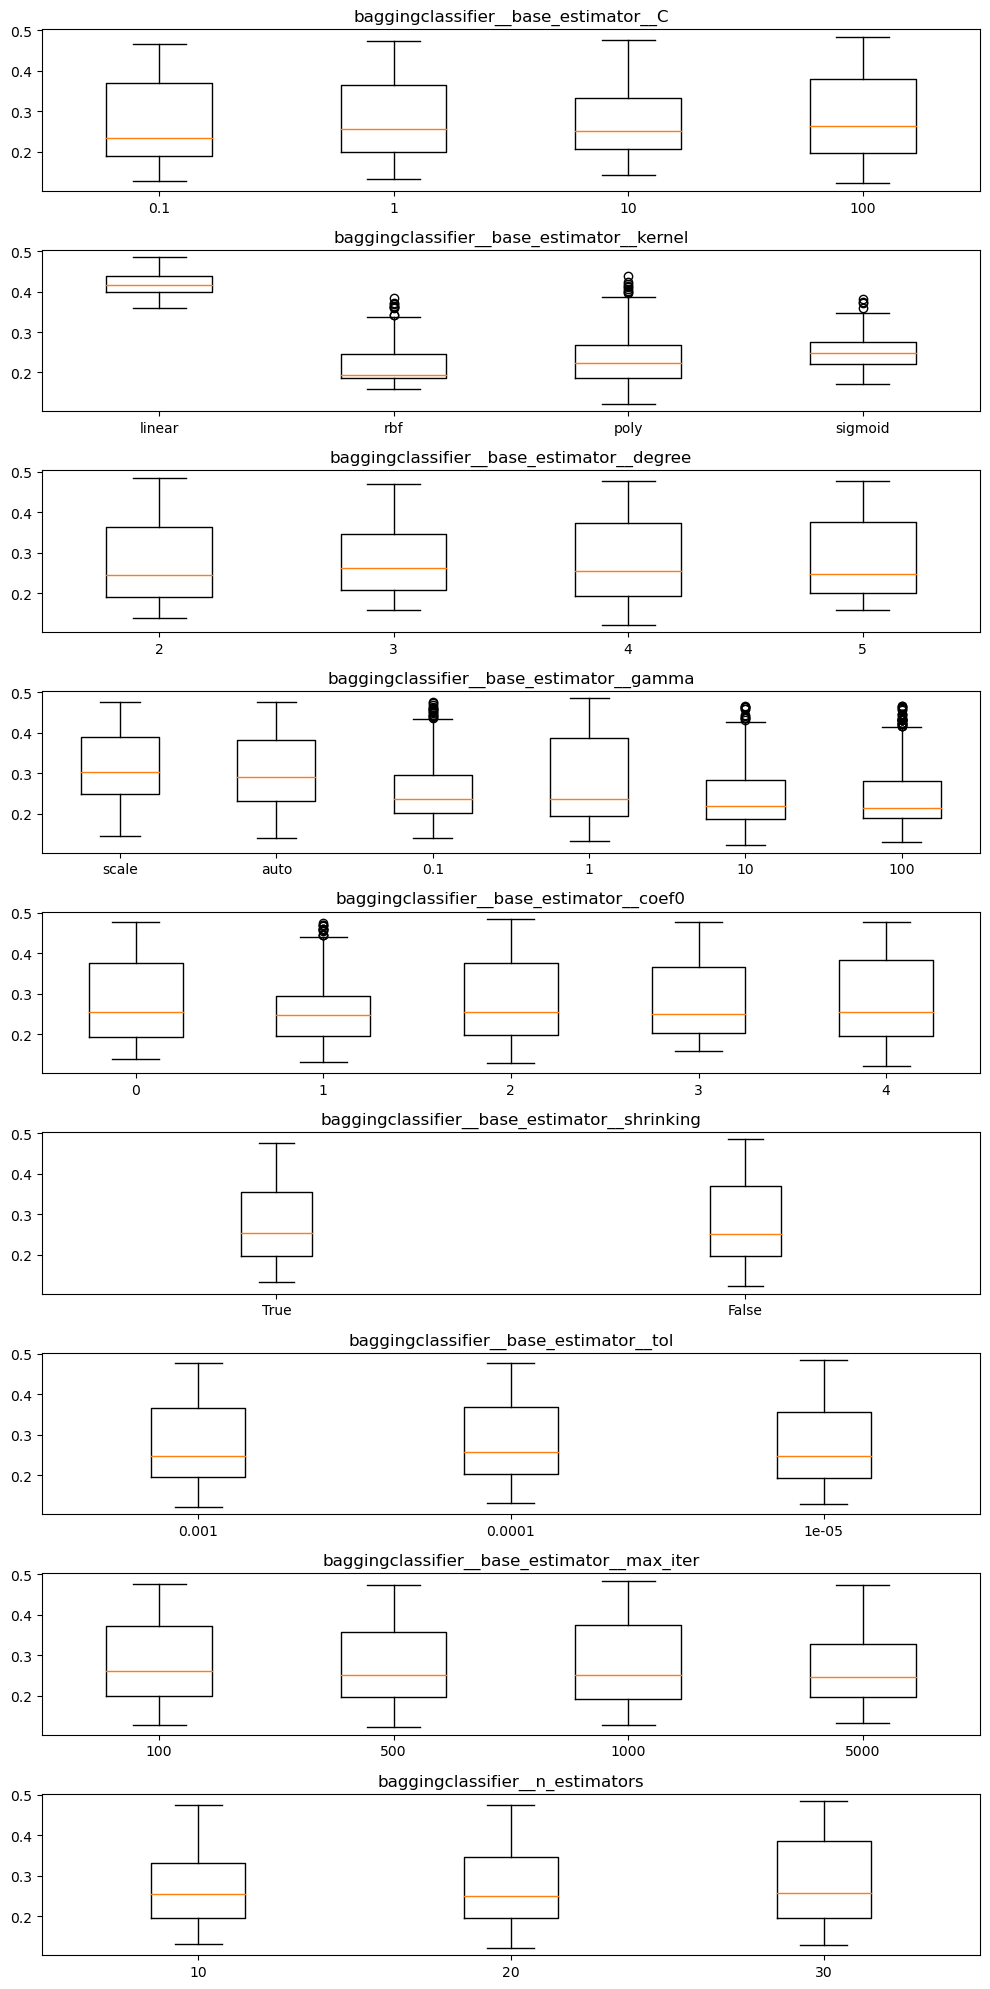

In [6]:
nb_trials = 100
best_params, all_results = search_for_best_hyperparameters(epochs, nb_trials, param_grid, best_time)
plot_best_hyperparameters(best_params, all_results, param_grid)

Limiting the number of trials

50 0.0
50 1.4084507042253522
50 2.8169014084507045
50 4.225352112676056
50 5.633802816901409
50 7.042253521126761
50 8.450704225352112
50 9.859154929577464
50 11.267605633802818
50 12.676056338028168
50 14.084507042253522
50 15.492957746478872
50 16.901408450704224
50 18.30985915492958
50 19.718309859154928
50 21.12676056338028
50 22.535211267605636
50 23.943661971830984
50 25.352112676056336
50 26.76056338028169
50 28.169014084507044
50 29.577464788732392
50 30.985915492957744
50 32.3943661971831
50 33.80281690140845
50 35.2112676056338
50 36.61971830985916
50 38.028169014084504
50 39.436619718309856
50 40.845070422535215
50 42.25352112676056
50 43.66197183098591
50 45.07042253521127
50 46.478873239436616
50 47.88732394366197
50 49.29577464788733
50 50.70422535211267
50 52.112676056338024
50 53.52112676056338
50 54.929577464788736
50 56.33802816901409
50 57.74647887323944
50 59.154929577464785
50 60.56338028169014
50 61.97183098591549
50 63.38028169014085
50 64.7887323943662
50 66.197

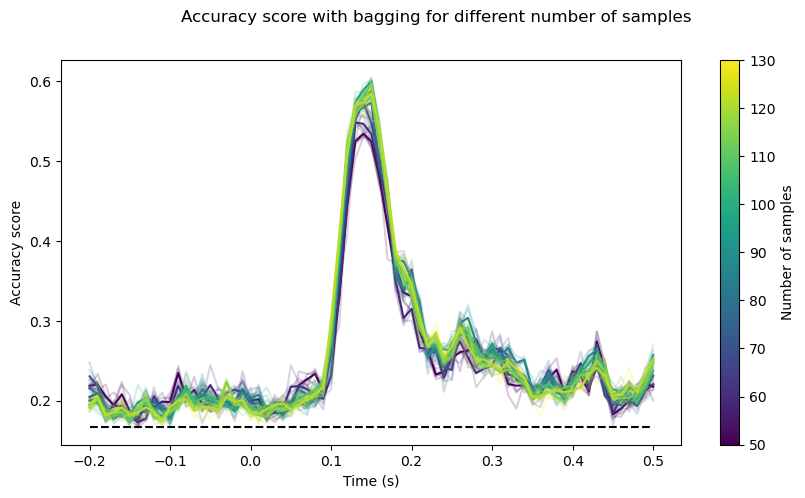

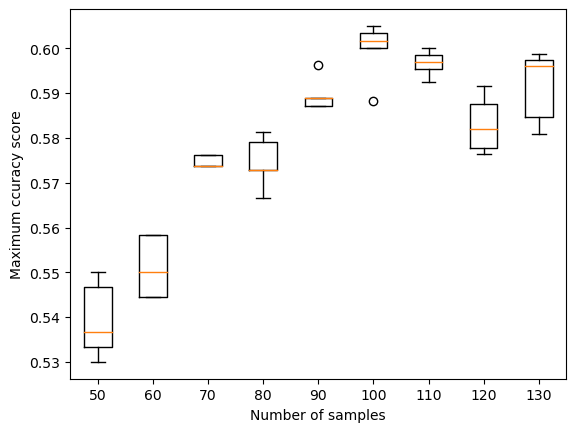

In [20]:
list_nb_trials = np.arange(50,140,10)
results_to_plot = test_nb_trials(epochs, list_nb_trials, param_grid)
plot_nb_trials(epochs, results_to_plot, list_nb_trials)
plot_maximum_accuracy(results_to_plot, list_nb_trials)

## New ways to transform the data

- Using multiple time points for training instead of one
- Using microaveraging technique
- Transform data into MCCA space

Using timeframes with meaning over time

0.0
1.4084507042253522
2.8169014084507045
4.225352112676056
5.633802816901409
7.042253521126761
8.450704225352112
9.859154929577464
11.267605633802818
12.676056338028168
14.084507042253522
15.492957746478872
16.901408450704224
18.30985915492958
19.718309859154928
21.12676056338028
22.535211267605636
23.943661971830984
25.352112676056336
26.76056338028169
28.169014084507044
29.577464788732392
30.985915492957744
32.3943661971831
33.80281690140845
35.2112676056338
36.61971830985916
38.028169014084504
39.436619718309856
40.845070422535215
42.25352112676056
43.66197183098591
45.07042253521127
46.478873239436616
47.88732394366197
49.29577464788733
50.70422535211267
52.112676056338024
53.52112676056338
54.929577464788736
56.33802816901409
57.74647887323944
59.154929577464785
60.56338028169014
61.97183098591549
63.38028169014085
64.7887323943662
66.19718309859155
67.6056338028169
69.01408450704226
70.4225352112676
71.83098591549296
73.23943661971832
74.64788732394366
76.05633802816901
77.46478

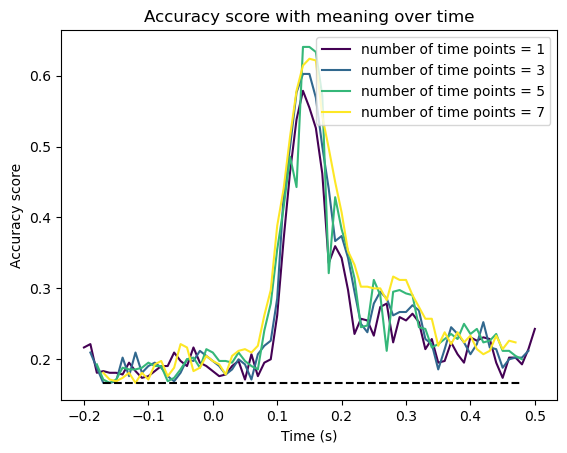

In [9]:
time_frame_results_normal = time_frame(epochs, nb_time_points=0, nb_trials_per_class=70, meaning_over_time=True, param_grid=param_grid)
time_frame_results_1 = time_frame(epochs, nb_time_points=1, nb_trials_per_class=70, meaning_over_time=True, param_grid=param_grid)
time_frame_results_2 = time_frame(epochs, nb_time_points=2, nb_trials_per_class=70, meaning_over_time=True, param_grid=param_grid)
time_frame_results_3 = time_frame(epochs, nb_time_points=3, nb_trials_per_class=70, meaning_over_time=True, param_grid=param_grid)
list_time_frame_results = [time_frame_results_normal, time_frame_results_1, time_frame_results_2, time_frame_results_3]
plot_time_frames(list_time_frame_results, epochs, list_nb_time_points=[0, 1, 2, 3], meaning_over_time=True)

Using timeframes without meaning over time

0.0
1.4084507042253522
2.8169014084507045
4.225352112676056
5.633802816901409
7.042253521126761
8.450704225352112
9.859154929577464
11.267605633802818
12.676056338028168
14.084507042253522
15.492957746478872
16.901408450704224
18.30985915492958
19.718309859154928
21.12676056338028
22.535211267605636
23.943661971830984
25.352112676056336
26.76056338028169
28.169014084507044
29.577464788732392
30.985915492957744
32.3943661971831
33.80281690140845
35.2112676056338
36.61971830985916
38.028169014084504
39.436619718309856
40.845070422535215
42.25352112676056
43.66197183098591
45.07042253521127
46.478873239436616
47.88732394366197
49.29577464788733
50.70422535211267
52.112676056338024
53.52112676056338
54.929577464788736
56.33802816901409
57.74647887323944
59.154929577464785
60.56338028169014
61.97183098591549
63.38028169014085
64.7887323943662
66.19718309859155
67.6056338028169
69.01408450704226
70.4225352112676
71.83098591549296
73.23943661971832
74.64788732394366
76.05633802816901
77.46478

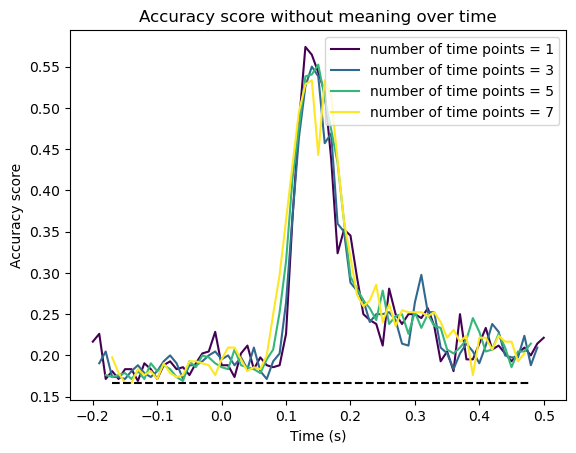

In [10]:
time_frame_results_normal = time_frame(epochs, nb_time_points=0, nb_trials_per_class=70, meaning_over_time=False, param_grid=param_grid)
time_frame_results_1 = time_frame(epochs, nb_time_points=1, nb_trials_per_class=70, meaning_over_time=False, param_grid=param_grid)
time_frame_results_2 = time_frame(epochs, nb_time_points=2, nb_trials_per_class=70, meaning_over_time=False, param_grid=param_grid)
time_frame_results_3 = time_frame(epochs, nb_time_points=3, nb_trials_per_class=70, meaning_over_time=False, param_grid=param_grid)
list_time_frame_results = [time_frame_results_normal, time_frame_results_1, time_frame_results_2, time_frame_results_3]
plot_time_frames(list_time_frame_results, epochs, list_nb_time_points=[0, 1, 2, 3], meaning_over_time=False)

Testing microaveraging

0.0
1.4084507042253522
2.8169014084507045
4.225352112676056
5.633802816901409
7.042253521126761
8.450704225352112
9.859154929577464
11.267605633802818
12.676056338028168
14.084507042253522
15.492957746478872
16.901408450704224
18.30985915492958
19.718309859154928
21.12676056338028
22.535211267605636
23.943661971830984
25.352112676056336
26.76056338028169
28.169014084507044
29.577464788732392
30.985915492957744
32.3943661971831
33.80281690140845
35.2112676056338
36.61971830985916
38.028169014084504
39.436619718309856
40.845070422535215
42.25352112676056
43.66197183098591
45.07042253521127
46.478873239436616
47.88732394366197
49.29577464788733
50.70422535211267
52.112676056338024
53.52112676056338
54.929577464788736
56.33802816901409
57.74647887323944
59.154929577464785
60.56338028169014
61.97183098591549
63.38028169014085
64.7887323943662
66.19718309859155
67.6056338028169
69.01408450704226
70.4225352112676
71.83098591549296
73.23943661971832
74.64788732394366
76.05633802816901
77.46478

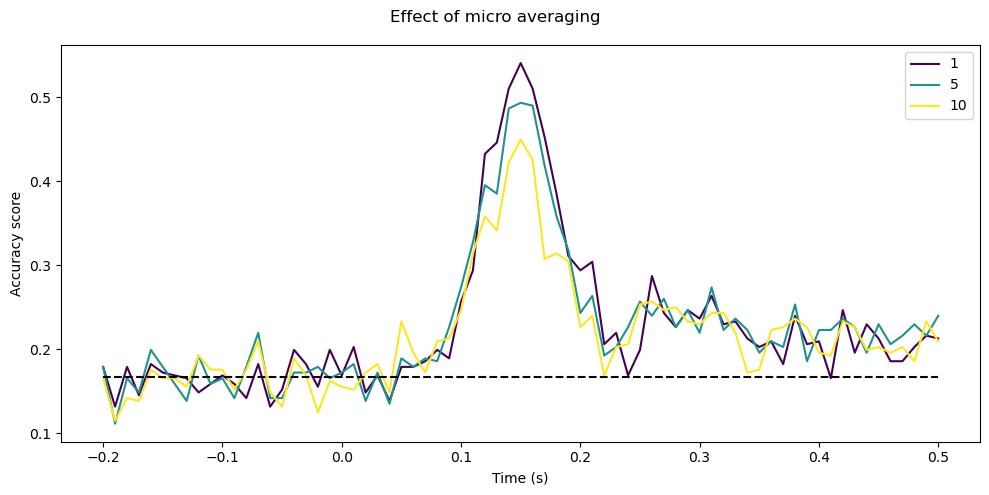

In [11]:
nb_trials = 100

bagging1 = machine_learning_for_micro_averaging(epochs, nb_trials, nb_trial_per_average=1, param_grid=param_grid)
bagging5 = machine_learning_for_micro_averaging(epochs, nb_trials, nb_trial_per_average=5, param_grid=param_grid)
bagging10 = machine_learning_for_micro_averaging(epochs, nb_trials, nb_trial_per_average=10, param_grid=param_grid)
baggings = [bagging1, bagging5, bagging10]
plot_microaveraging(baggings, epochs)

Testing MCCA transformation

Time point 0 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 1 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 2 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 3 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 4 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 5 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 6 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 7 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 8 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 9 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 10 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 11 of 71
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
SVC()
Time point 12 of 71
SVC()
SVC()
SVC()
SVC()
SVC()


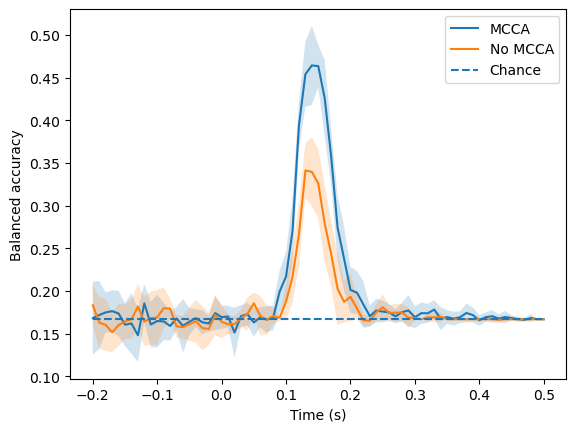

In [13]:
result_MCCA_t, result_no_MCCA_t = intra_subject_decoder(epochs, param_grid)
plot_result_microaveraging(epochs, result_MCCA_t, result_no_MCCA_t)